### INSTALL REQUESTS AND BEAUTIFULSOUP LIBRARY

In [1]:
%pip install requests bs4


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import requests
from bs4 import BeautifulSoup

b'<!doctype html >\n<html lang="en-GB">\n<head>\n<meta charset="UTF-8" />\n<title>Politics Archives | OpIndia</title>\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="pingback" href="https://www.opindia.com/xmlrpc.php" />\n<meta name="robots" content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" />\n<link rel="icon" type="image/png" href="https://www.opindia.com/wp-content/uploads/2018/10/opindia-logo-300x300.png">\n\n<meta name="description" content="All articles in Politics category published on OpIndia" />\n<link rel="canonical" href="https://www.opindia.com/category/politics/" />\n<link rel="next" href="https://www.opindia.com/category/politics/page/2/" />\n<meta property="og:locale" content="en_GB" />\n<meta property="og:type" content="article" />\n<meta property="og:title" content="Politics Archives | OpIndia" />\n<meta property="og:description" content="All articles in Politics category published on OpIndia" />\
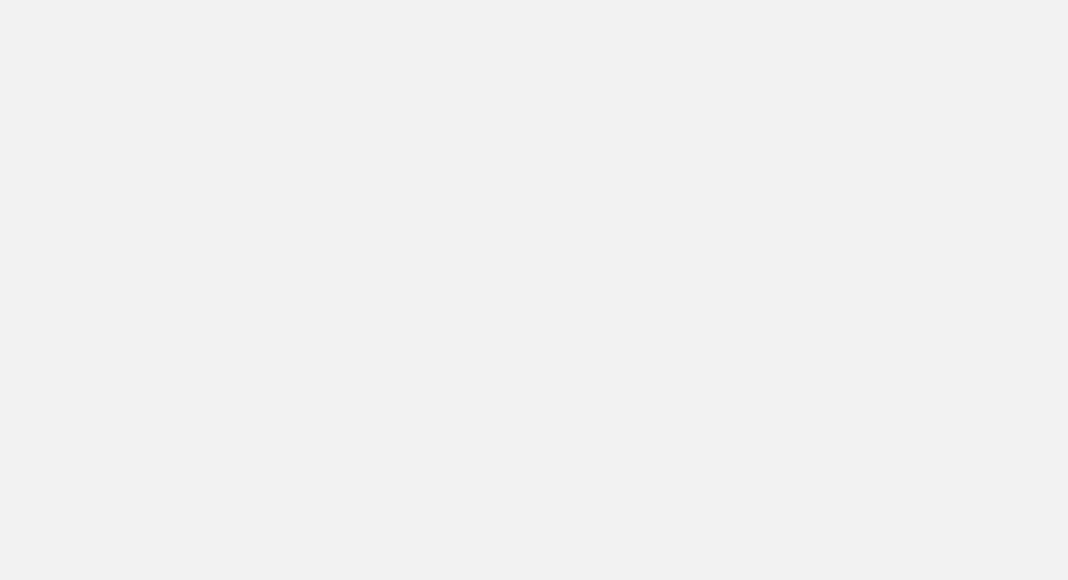

In [4]:
url= "https://www.opindia.com/category/politics/"
data = requests.get(url)
data.content

In [5]:
data

<Response [200]>

In [6]:
bs=BeautifulSoup(data.content)

In [7]:
headings= bs.find_all('h3',class_="entry-title td-module-title")

In [8]:
headings

[<h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/11/chhattisgarh-bjp-leader-ratan-dubey-killed-by-maoists-in-narayanpur/" rel="bookmark" title="In poll-bound Chhattisgarh, BJP leader Ratan Dubey killed during campaigning by Maoists in Narayanpur">In poll-bound Chhattisgarh, BJP leader Ratan Dubey killed during campaigning by Maoists in Narayanpur</a></h3>,
 <h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/11/assembly-elections-opinion-poll-by-pollsters-india-show-bjp-winning-madhya-pradesh/" rel="bookmark" title="Assembly elections: Opinion poll by Pollsters India shows BJP is set to win Madhya Pradesh, welfare schemes for women emerge as the major factor">Assembly elections: Opinion poll by Pollsters India shows BJP is set to win Madhya Pradesh, welfare schemes for women emerge as the major factor</a></h3>,
 <h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/11/i-dont-expect-votes-from-miya-muslims-a

In [9]:
headings[0]

<h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/11/chhattisgarh-bjp-leader-ratan-dubey-killed-by-maoists-in-narayanpur/" rel="bookmark" title="In poll-bound Chhattisgarh, BJP leader Ratan Dubey killed during campaigning by Maoists in Narayanpur">In poll-bound Chhattisgarh, BJP leader Ratan Dubey killed during campaigning by Maoists in Narayanpur</a></h3>

In [10]:
headings[0].find('a').get('href')

'https://www.opindia.com/2023/11/chhattisgarh-bjp-leader-ratan-dubey-killed-by-maoists-in-narayanpur/'

## CREATING A FUNCTION


In [11]:
def get_news_urls(url):
    data=requests.get(url)
    bs=BeautifulSoup(data.content)
    headings=bs.find_all('h3',class_="entry-title td-module-title")
    links=[]
    for i in headings:
        s= i.find('a').get('href')
        links.append(s)

    return links
       

In [12]:
links=get_news_urls(url)

In [13]:
len(links)

74

### FOR URL FETCH HEADINGS

In [14]:
links[0]

'https://www.opindia.com/2023/11/chhattisgarh-bjp-leader-ratan-dubey-killed-by-maoists-in-narayanpur/'

In [15]:
data2=requests.get(links[0])

In [16]:
data2

<Response [200]>

In [17]:
bs2=BeautifulSoup(data2.content)

In [18]:
bs2.find('h1',class_='tdb-title-text').text

'In poll-bound Chhattisgarh, BJP leader Ratan Dubey killed during campaigning by Maoists in Narayanpur'

### TIMING CALCULATION

In [19]:
t= bs2.find('time',class_='entry-date updated td-module-date').text

In [20]:
t

'5 November, 2023 '

In [21]:
content= bs2.find_all('p')
content

[<p>Ratan Dubey, who was a member of the Narayanpur Zilla Panchayat, had come to Kaushalnar village to campaign for BJP candidate Kedar Kashyap who is contesting against Congress's Chandan Kashyap</p>,
 <p>On Saturday (4th November), BJP leader Ratan Dubey was brutally <a href="https://www.indiatoday.in/elections/chhattisgarh-assembly-polls-2023/story/chhattisgarh-bjp-leader-ratan-dubey-killed-by-naxalites-assembly-election-2458119-2023-11-04" rel="noreferrer noopener" target="_blank">murdered</a> by Maoists in the insurgency-hit Narayanpur district of Chhattisgarh. The BJP’s district vice-president’s murder comes ahead of the first phase of polling in the state.</p>,
 <p dir="ltr" lang="en">Chhattisgarh | A BJP leader (Ratan Dubey) was murdered today in the insurgency-hit Narayanpur district of Chhattisgarh, said Bastar Range IG Sundarraj P. <br/><br/>On being asked about Naxal involvement, the IG said that a team has been dispatched to the location and anything in this…</p>,
 <p>Rata

In [22]:
content[0].text

"Ratan Dubey, who was a member of the Narayanpur Zilla Panchayat, had come to Kaushalnar village to campaign for BJP candidate Kedar Kashyap who is contesting against Congress's Chandan Kashyap"

In [23]:
def get_news_details(url):
    data2=requests.get(url)
    bs2=BeautifulSoup(data2.content)
    h= bs2.find('h1',class_='tdb-title-text').text
    t= bs2.find('time',class_='entry-date updated td-module-date').text
    cont= bs2.find_all('p')
    news=" "
    for i in cont:
        news=news + i.text
    return h,t,news    

In [24]:
h,t,news= get_news_details(links[0])

In [25]:
h

'In poll-bound Chhattisgarh, BJP leader Ratan Dubey killed during campaigning by Maoists in Narayanpur'

In [26]:
t

'5 November, 2023 '

In [27]:
news

' Ratan Dubey, who was a member of the Narayanpur Zilla Panchayat, had come to Kaushalnar village to campaign for BJP candidate Kedar Kashyap who is contesting against Congress\'s Chandan KashyapOn Saturday (4th November), BJP leader Ratan Dubey was brutally murdered by Maoists in the insurgency-hit Narayanpur district of Chhattisgarh. The BJP’s district vice-president’s murder comes ahead of the first phase of polling in the state.Chhattisgarh | A BJP leader (Ratan Dubey) was murdered today in the insurgency-hit Narayanpur district of Chhattisgarh, said Bastar Range IG Sundarraj P. On being asked about Naxal involvement, the IG said that a team has been dispatched to the location and anything in this…Ratan Dubey, who was a member of the Narayanpur Zilla Panchayat, had come to Kaushalnar village to campaign for BJP candidate Kedar Kashyap who is contesting against Congress’s Chandan Kashyap. Dubey was first shot and then attacked with sharp weapons, including axes and daggers, in the D

### SAVING ALL THE DATA IN DATAFRAME

In [28]:
date=[]
title=[]
articles=[]
import pandas as pd

In [29]:
def get_news_df(url):
    # get news links
    links=get_news_urls(url)
    # get news details
    for i in links:
        h,t,news=get_news_details(i)
        title.append(h)
        date.append(t)
        articles.append(news)
    # create dictionary
    dct={
        'Date':date,
        'Heading':title,
        'News':articles,
        'url':links
    }
    # create a dataframe
    df=pd.DataFrame(dct)
    return df


In [30]:
df= get_news_df(url)
df

,Date,Heading,News,url
0,"5 November, 2023","In poll-bound Chhattisgarh, BJP leader Ratan D...","Ratan Dubey, who was a member of the Narayanp...",https://www.opindia.com/2023/11/chhattisgarh-b...
1,"4 November, 2023",Assembly elections: Opinion poll by Pollsters ...,Even though BJP has been in power for 19 year...,https://www.opindia.com/2023/11/assembly-elect...
2,"4 November, 2023",“I don’t expect votes from Miya Muslims”: Assa...,The Assam Chief Minister further said that th...,https://www.opindia.com/2023/11/i-dont-expect-...
3,"4 November, 2023",Gujarat: AAP MLA Chaitar Vasava absconding aft...,AAP MLA Chaitar Vasava summoned forest depart...,https://www.opindia.com/2023/11/gujarat-aap-ml...
4,"4 November, 2023",Infighting continues in MP Congress unit: 39 l...,A few of the prominent names expelled from th...,https://www.opindia.com/2023/11/mp-congress-un...
...,...,...,...,...
69,"3 November, 2023",Hamas accused of killing women and children fo...,While the video was shared claiming that Isra...,https://www.opindia.com/2023/11/hamas-accused-...
70,"3 November, 2023","Maharashtra: Salman praises Tipu Sultan, shows...","As per the FIR filed in the case, a man named...",https://www.opindia.com/2023/11/maharashtra-sa...
71,"4 November, 2023",Khalistani terrorist Gurpatwant Singh Pannun i...,"Gurpatwant Singh Pannun said, ""Freedom is our...",https://www.opindia.com/2023/11/gurpatwant-sin...
72,"1 November, 2023",Who is Mr FAFO? The ‘Pallywood’ actor from Gaz...,Saleh Aljafarawi claims to be a Palestinian n...,https://www.opindia.com/2023/11/mr-fafo-the-pa...


### saving dataframe in csv file

In [31]:
df.to_csv('OPINDIAnews.csv')